# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("C:\\Users\\rajma\\OneDrive\\Desktop\\Data\\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [28]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [29]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [30]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [31]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Data Visualization using Matplotlib and Seaborn

<b>Bar Plot for Sales Channel

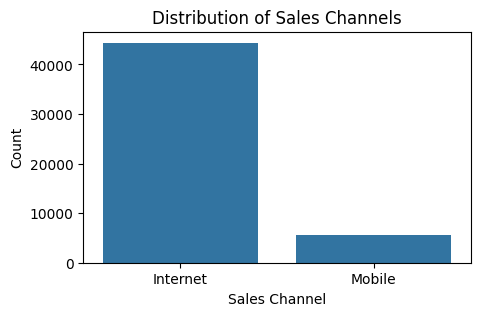

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.countplot(x='sales_channel', data=df)
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

<b>Bar Plot for Trip Type

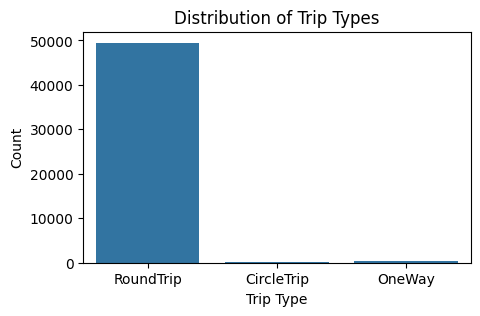

In [33]:
plt.figure(figsize=(5, 3))
sns.countplot(x='trip_type', data=df)
plt.title('Distribution of Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

<b>Histogram of Purchase Lead Time

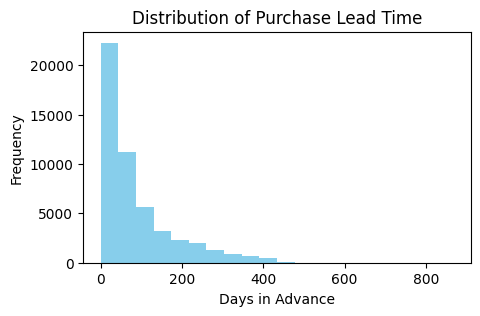

In [12]:
plt.figure(figsize=(5, 3))
plt.hist(df['purchase_lead'], bins=20, color='skyblue')
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Days in Advance')
plt.ylabel('Frequency')
plt.show()

<b>Bar Plot for Passengers Requesting Extra Baggage

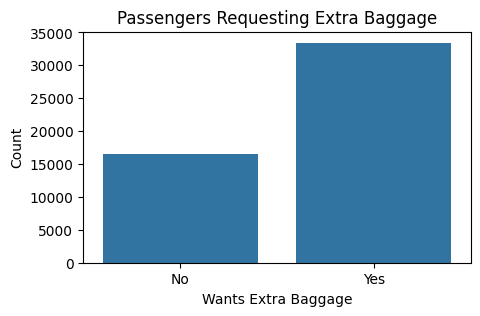

In [15]:
plt.figure(figsize=(5, 3))
sns.countplot(x='wants_extra_baggage', data=df)
plt.title('Passengers Requesting Extra Baggage')
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

<b>Heatmap for Correlation Between Numerical Features

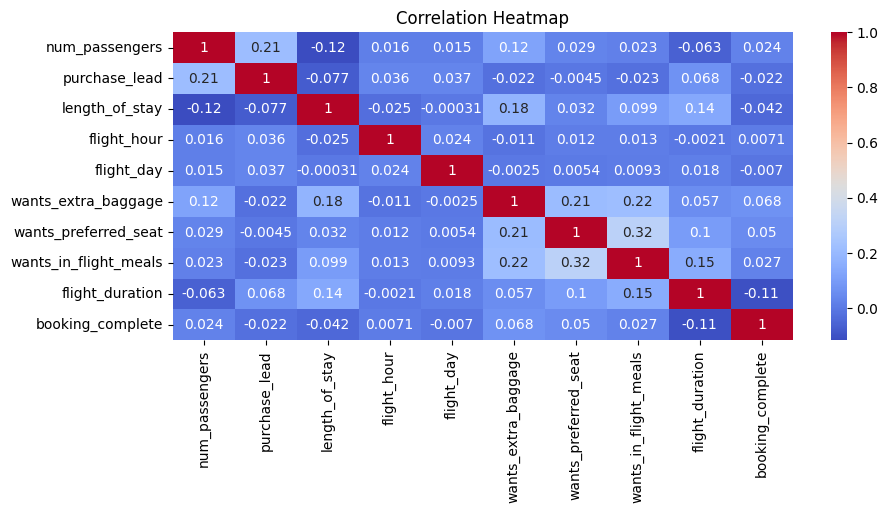

In [22]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10,4))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Preparing dataset for Predictive Modeling

<b>Data Preprocessing</b>

We'll encode categorical variables and prepare the data for modeling.

In [37]:
%pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load data (assuming your data is in df)
# df = pd.read_csv("your_dataset.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['booking_complete'])
y = df_encoded['booking_complete']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 7.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 4.2 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 4.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 4.0 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 3.9 MB/s eta 0:00:01
   ---

<b>Train a Machine Learning Model</b>

We'll train a Random Forest classifier as an example

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

<b> Model Evaluation </b>

Evaluate the performance using various metrics.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8539
Precision: 0.5270655270655271
Recall: 0.125
F1 Score: 0.2020753686510104
Confusion Matrix:
[[8354  166]
 [1295  185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.12      0.20      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



<b> ROC Curve for Model Evaluation </b>

Visualize the ROC curve to evaluate the performance of the model.

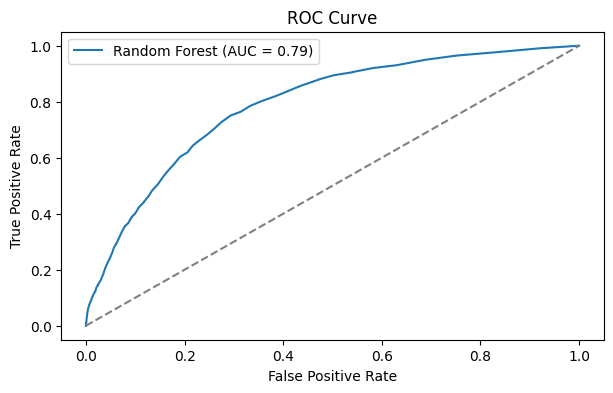

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<b>Heatmap of the Top Features

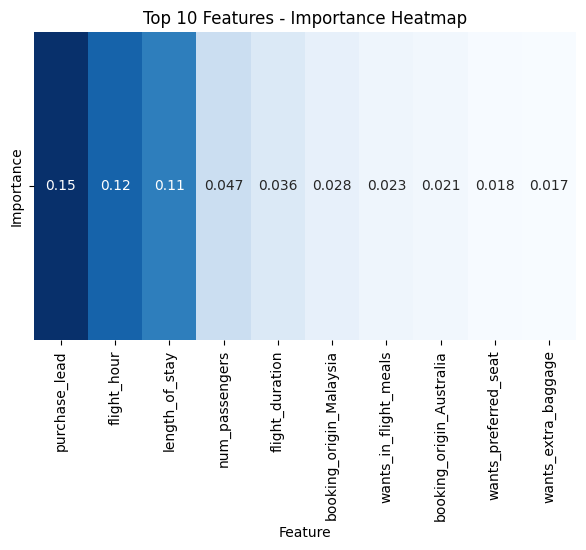

In [48]:
top_n = 10
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

plt.figure(figsize=(7, 4))
sns.heatmap(top_features.set_index('Feature').T, cmap='Blues', annot=True, cbar=False)
plt.title(f'Top {top_n} Features - Importance Heatmap')
plt.show()

<b>Conclusion</b>

In this project, we successfully built a predictive model to estimate the likelihood of flight bookings being completed. By using a Random Forest classifier, we were able to analyze various factors, including the sales channel, trip type, purchase lead time, and customer preferences such as baggage and seat options.

Through feature importance analysis, we identified key contributors to booking completion, with variables like purchase lead time and booking origin playing significant roles. The model's performance, evaluated using metrics such as accuracy, precision, and recall, demonstrated its capability in distinguishing between completed and non-completed bookings.

This project offers valuable insights on British Airways, enabling them to better understand customer behavior and optimize services to improve booking completion rates. Future enhancements can include the exploration of additional features and the use of more advanced machine learning techniques to further improve prediction accuracy.